In [3]:
# UNSUPERVISED LEARNING - Clustering

# 1- Load and Explore the data
import pandas as pd
import os

path = "C:/Users/yasin/Desktop/COMP-309/Week-10"
filename = 'wine.csv'

fullpath = os.path.join(path,filename)
data_viji_wine = pd.read_csv(fullpath,sep=';')

data_viji_wine.columns.values
data_viji_wine.shape
data_viji_wine.describe()
data_viji_wine.dtypes
data_viji_wine.head()

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# Find the unique values of the quality attribute

data_viji_wine['quality'].value_counts()
data_viji_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
# Find the mean of the various chemical compositions across samples for the different groups of the wine quality
data_viji_wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

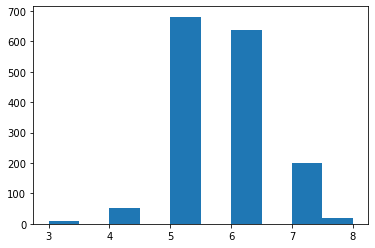

In [7]:
# 2- Plot a histogram to see the number of wine samples in each quality type
import matplotlib.pyplot as plt
plt.hist(data_viji_wine['quality'])

C:\Users\yasin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\yasin\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\yasin\anaconda3\lib\site-packages\seab

<AxesSubplot:xlabel='quality', ylabel='quality'>

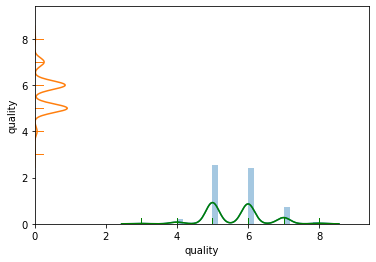

In [12]:
# 3- Use seaborn library to generate different plots: histograms, pairplots, heatmaps...etc. and investigate the correlations
import seaborn as sns

sns.distplot(data_viji_wine['quality'])
sns.distplot(data_viji_wine['quality'], rug=True, hist=False, color = 'g')
sns.distplot(data_viji_wine['quality'], rug=True, hist=False, vertical = True)

C:\Users\yasin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

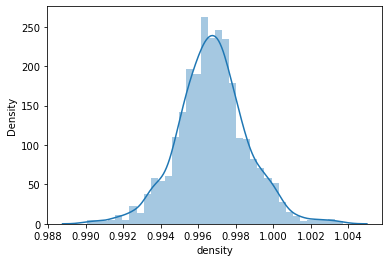

In [9]:
# plot only the density function
sns.distplot(data_viji_wine['density'])

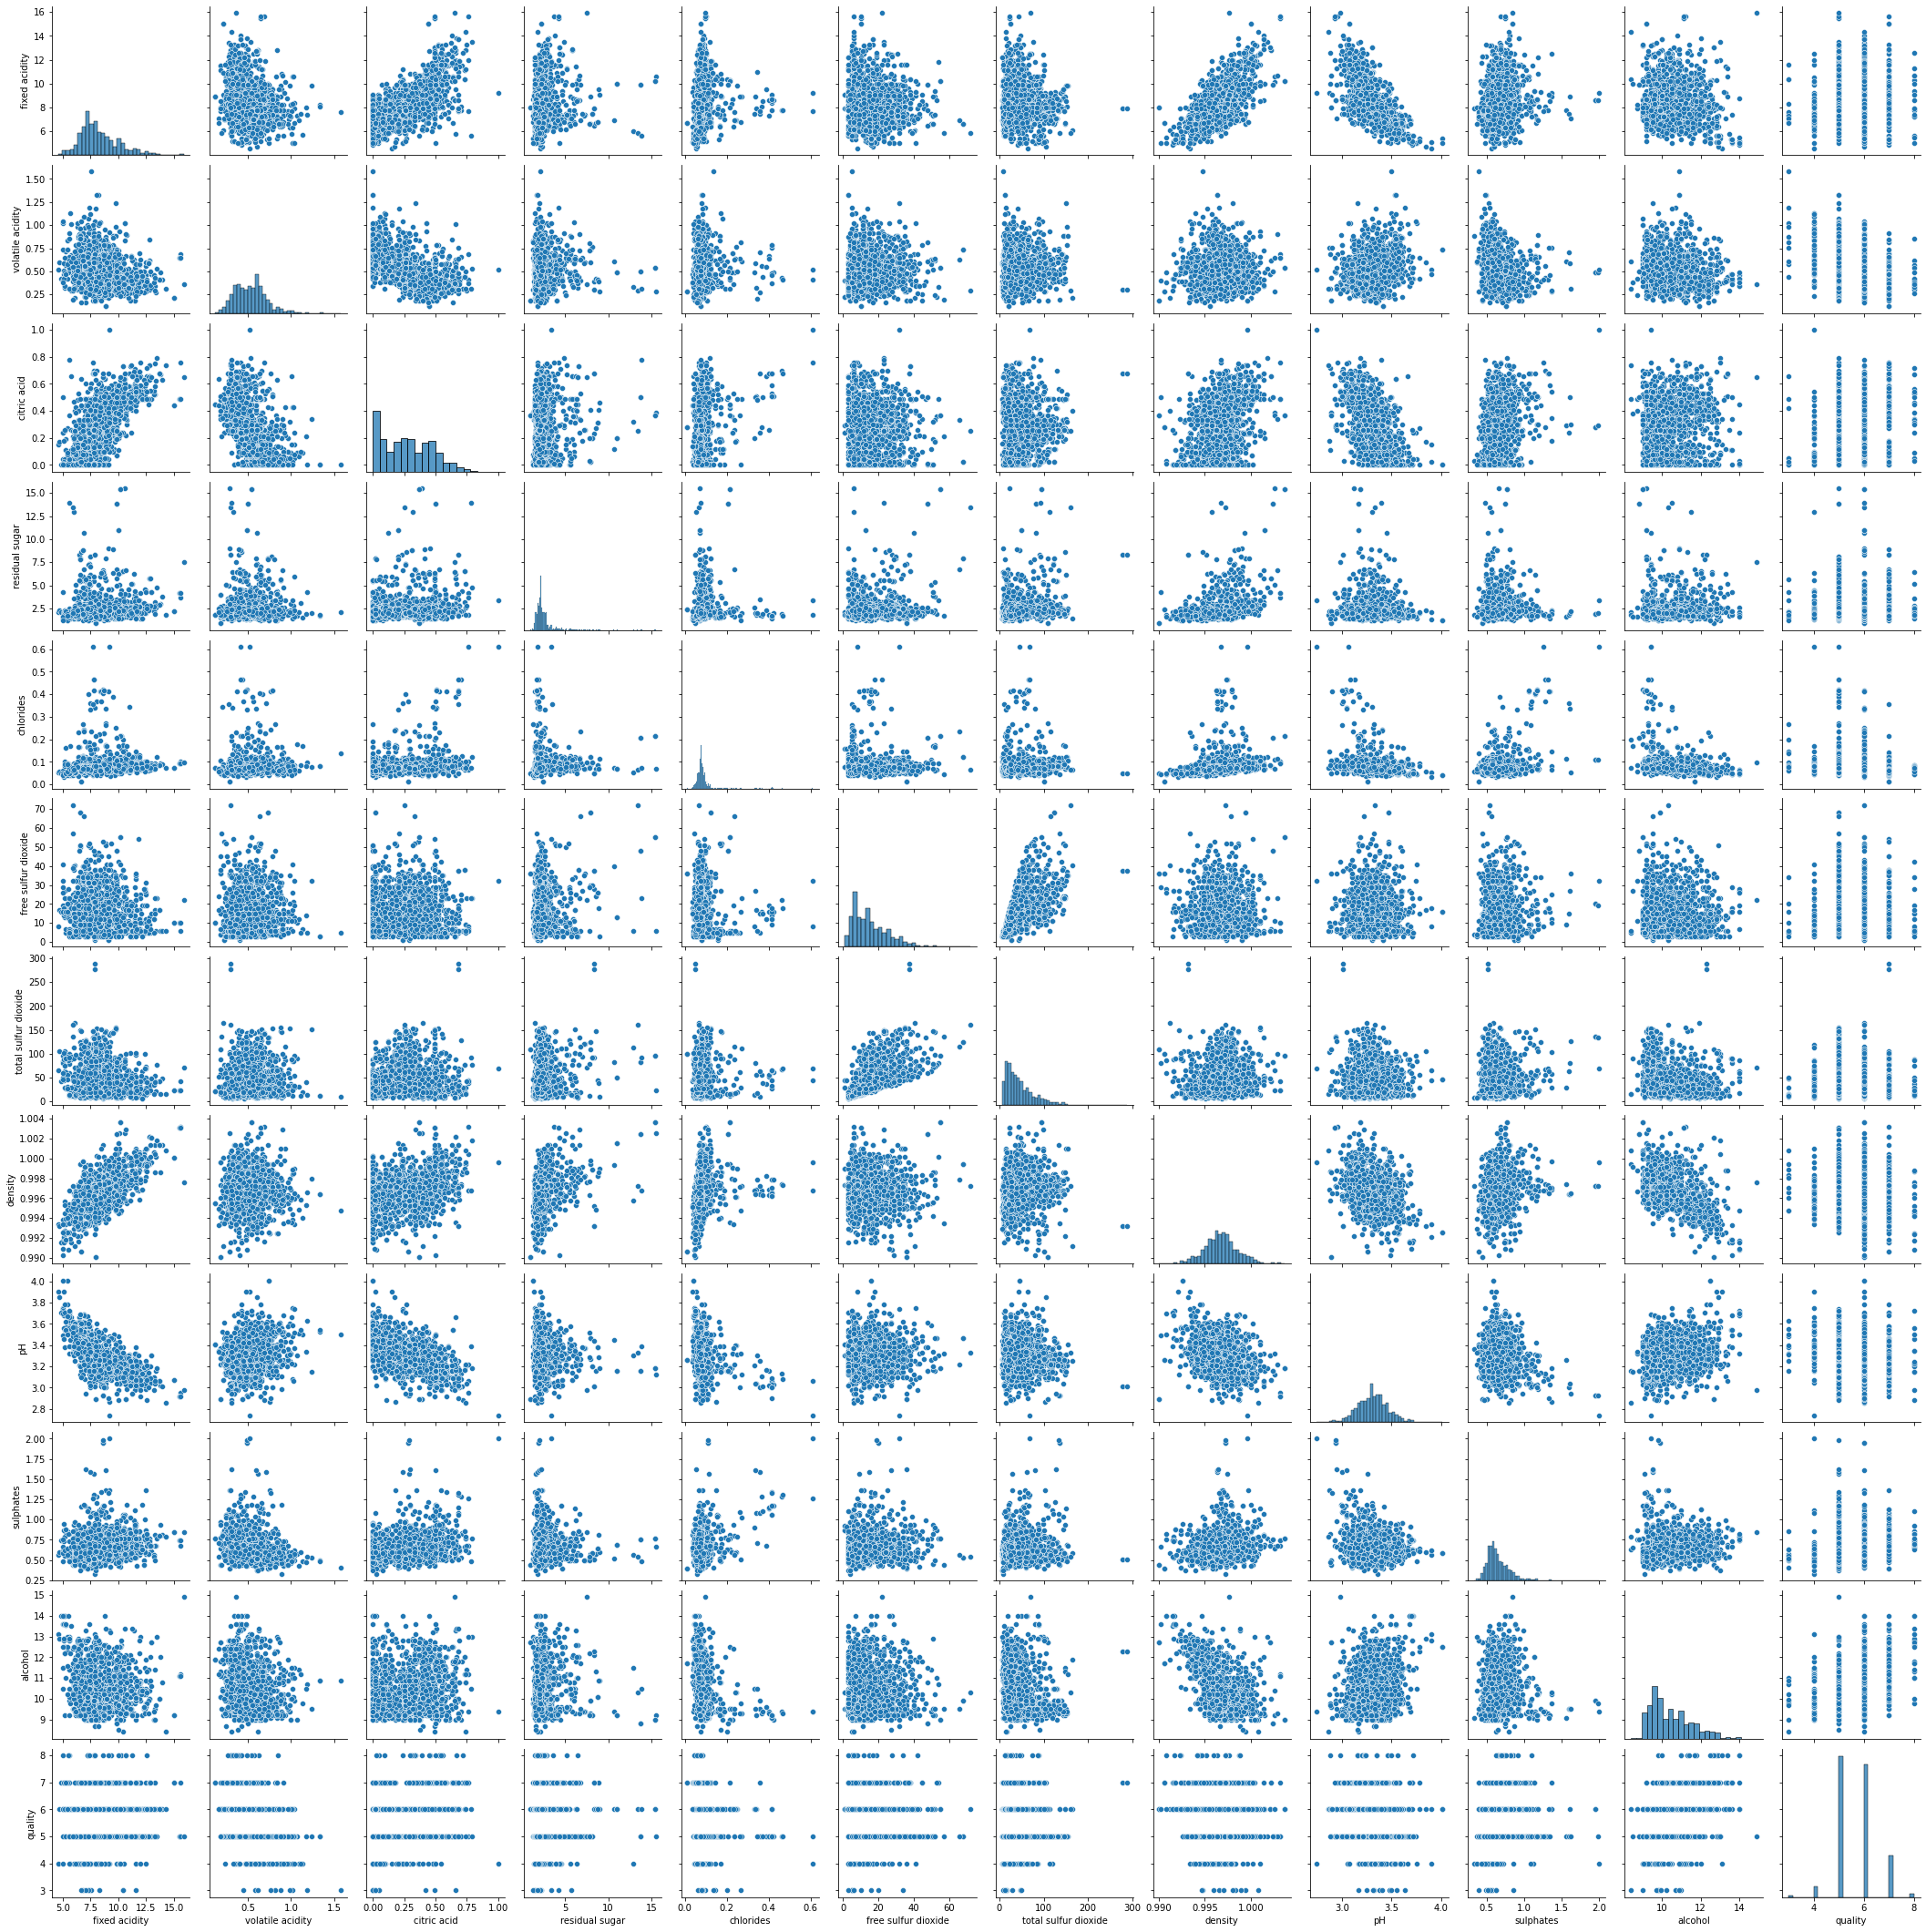

In [13]:
# Check all correlations. Here it take longer time to execute
sns.pairplot(data_viji_wine)

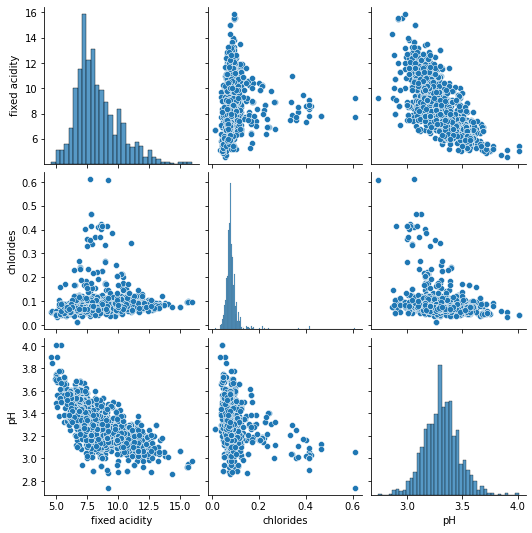

In [14]:
#subset three column

x = data_viji_wine[['fixed acidity', 'chlorides','pH']]

sns.pairplot(x)

<AxesSubplot:>

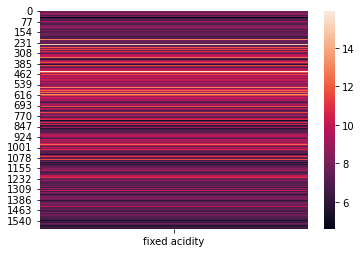

In [20]:
# Generate heatmaps
sns.heatmap(data_viji_wine[['fixed acidity']])

<AxesSubplot:>

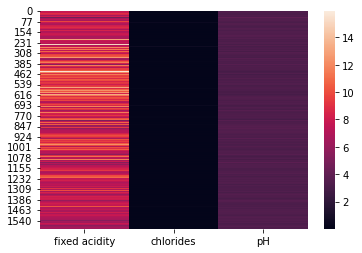

In [22]:
sns.heatmap(x)

<AxesSubplot:>

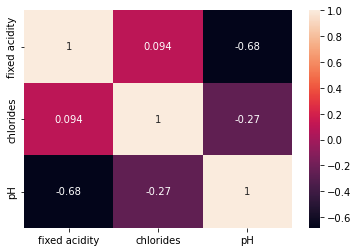

In [28]:
sns.heatmap(x.corr(),annot=True)

<AxesSubplot:>

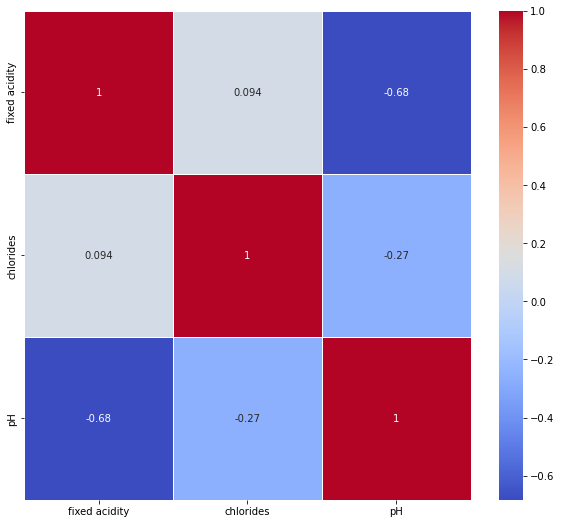

In [31]:
plt.figure(figsize=(10,9))
sns.heatmap(x.corr(),annot=True, cmap='coolwarm',linewidth=0.5)

<AxesSubplot:>

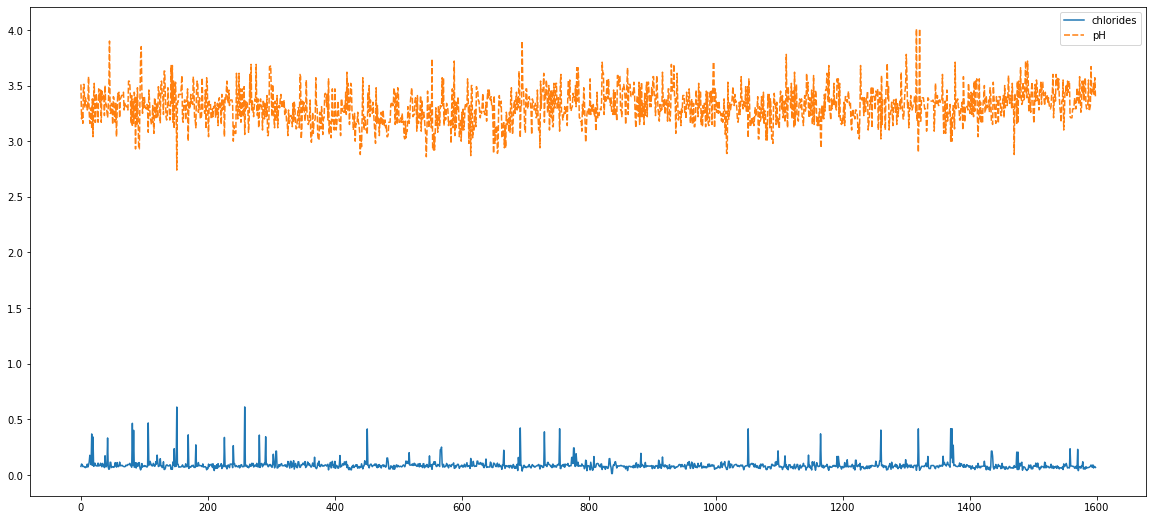

In [33]:
#Generate lineplot
y = data_viji_wine[['chlorides', 'pH']]

plt.figure(figsize=(20,9))
sns.lineplot(data=y)

<AxesSubplot:xlabel='chlorides', ylabel='pH'>

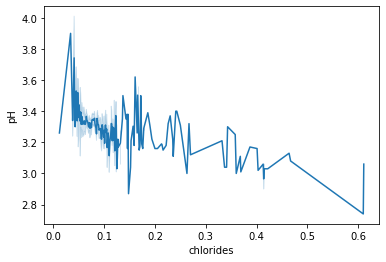

In [34]:
sns.lineplot(data=y, x='chlorides', y='pH')

<AxesSubplot:>

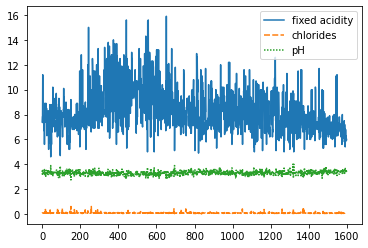

In [36]:
x = data_viji_wine[['fixed acidity', 'chlorides','pH']]
sns.lineplot(data=x)

In [37]:
# 4- Normalize the data in order to apply clustering
# Z=(X-X(min))/(X(max)-X(min))

data_viji_wine_norm = (data_viji_wine - data_viji_wine.min()) / (data_viji_wine.max() - data_viji_wine.min())
data_viji_wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


<AxesSubplot:>

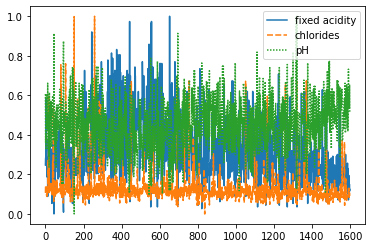

In [38]:
# 5- Generate some additional plots for the normalized data

x1 = data_viji_wine_norm[['fixed acidity','chlorides','pH']]

sns.lineplot(data=x1)

<AxesSubplot:>

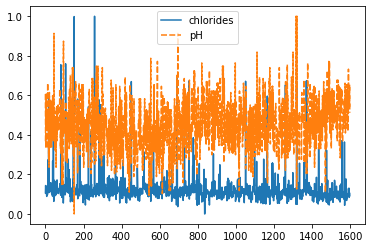

In [39]:
y1 = data_viji_wine_norm[['chlorides', 'pH']]

sns.lineplot(data=y1)

<AxesSubplot:xlabel='chlorides', ylabel='pH'>

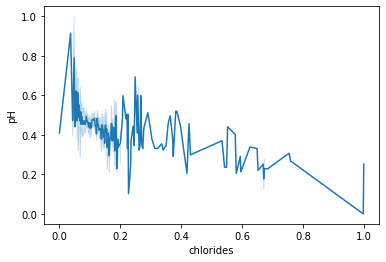

In [41]:
sns.lineplot(data=y1,x='chlorides',y='pH')

In [44]:
# 6- Cluster the data (observations) into 6 clusters using k-means clustering algorithm

from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)
model.fit(data_viji_wine_norm)

KMeans(n_clusters=6)

In [47]:
# 7- Check the results as follows:

# a. Print the model labels
model.labels_

array([1, 1, 1, ..., 2, 2, 5])

In [49]:
# b. Append the clusters to each record on the dataframe, i.e. add a new column for clusters
md = pd.Series(model.labels_)
data_viji_wine_norm['clust']= md
data_viji_wine_norm.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,1
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846,0.4,1
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846,0.4,1
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154,0.8,2
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231,0.8,1
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077,0.4,4


In [50]:
# c. find the final cluster's centroids for each cluster
model.cluster_centers_

array([[0.58242935, 0.20579706, 0.51197581, 0.13400354, 0.13117965,
        0.13908451, 0.09183005, 0.65596431, 0.33194691, 0.22249855,
        0.29185277, 0.54758065],
       [0.26288805, 0.36009866, 0.11775794, 0.09152125, 0.12257864,
        0.14479935, 0.10721297, 0.49071161, 0.48729846, 0.15502329,
        0.22069088, 0.44087302],
       [0.17374765, 0.32511002, 0.09027149, 0.09344201, 0.09552875,
        0.25205532, 0.1239787 , 0.32289154, 0.58039691, 0.18600807,
        0.49163476, 0.61266968],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821, 0.46666667],
       [0.31615802, 0.27819741, 0.30367601, 0.15109034, 0.12690933,
        0.37876793, 0.29641249, 0.53832553, 0.43665219, 0.1784655 ,
        0.21436217, 0.45358255],
       [0.36148029, 0.16073474, 0.41854545, 0.10438356, 0.10601912,
        0.15984635, 0.08353357, 0.41547991, 0.42073014, 0.23560152,
        0.47865734,

In [51]:
# d. Calculate the J-scores The J-score can be thought of as the sum of the squared distance between points and cluster centroid
# for each point and cluster. For an efficient cluster, the J-score should be as low as possible

model.inertia_

186.54302104790844

Text(0, 0.5, 'Frequency')

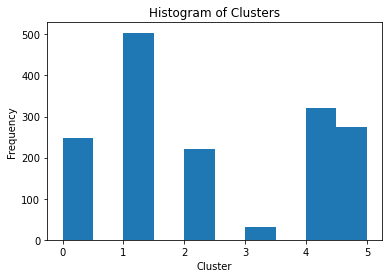

In [52]:
# e. plot a histogram for the clusters variable to get an idea of the number of observations in each cluster

plt.hist(data_viji_wine_norm['clust'])
plt.title('Histogram of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

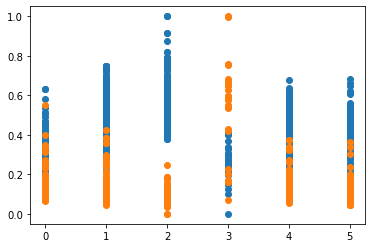

In [55]:
# plot a scatter
plt.scatter(data_viji_wine_norm['clust'],data_viji_wine_norm['pH'])
plt.scatter(data_viji_wine_norm['clust'],data_viji_wine_norm['chlorides'])

In [56]:
# 8- Re-cluster the data into three clusters 
model1=KMeans(n_clusters=3)
model1.fit(data_viji_wine_norm)

KMeans(n_clusters=3)

In [57]:
# check the results.
model1.labels_
md1=pd.Series(model1.labels_)
data_viji_wine_norm['clust']=md1
data_viji_wine_norm.head(10)
model1.cluster_centers_

array([[2.35715594e-01, 3.49433160e-01, 1.09379310e-01, 9.21067548e-02,
        1.14333084e-01, 1.77493929e-01, 1.12323626e-01, 4.39555421e-01,
        5.15677437e-01, 1.64468305e-01, 3.03282051e-01, 4.93241379e-01,
        1.30482759e+00],
       [3.37074840e-01, 2.27269246e-01, 3.62651757e-01, 1.26953040e-01,
        1.37428195e-01, 2.74479143e-01, 1.98788652e-01, 4.83212763e-01,
        4.19926543e-01, 2.23288248e-01, 3.28106824e-01, 5.58466454e-01,
        4.39137380e+00],
       [5.82429346e-01, 2.05797061e-01, 5.11975806e-01, 1.34003535e-01,
        1.31179654e-01, 1.39084507e-01, 9.18300467e-02, 6.55964308e-01,
        3.31946914e-01, 2.22498551e-01, 2.91852771e-01, 5.47580645e-01,
        2.22044605e-15]])

Text(0, 0.5, 'Frequency')

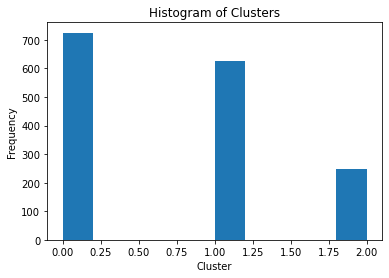

In [58]:
plt.hist(data_viji_wine_norm['clust'])
plt.title('Histogram of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

In [60]:
# Assuming you have already fit the KMeans model and have data_viji_wine_norm

# Reduce dimensionality using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_viji_wine_norm)


In [65]:
# A  DataFrame
data_with_pca = pd.DataFrame(data_viji_wine_norm, columns=[f'features_{i}' for i in range(data_viji_wine_norm.shape[1])])

data_with_pca['PCA1'] = pca_result[:, 0]
data_with_pca['PCA2'] = pca_result[:, 1]

# Add cluster labels to the DataFrame
data_with_pca['Cluster'] = model.labels_

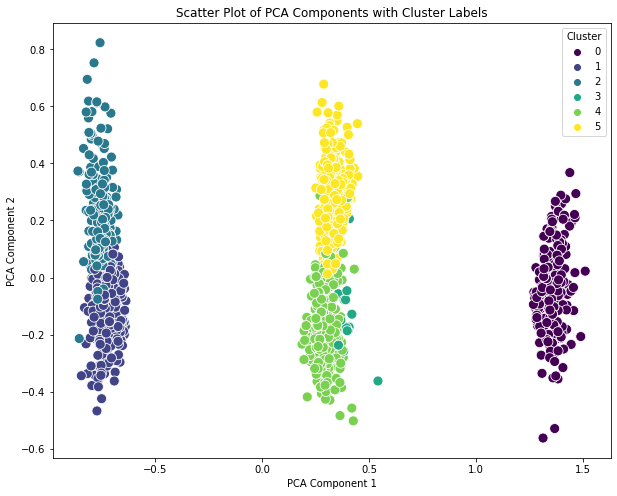

In [66]:
#plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_with_pca, palette='viridis', s=100)

plt.title('Scatter Plot of PCA Components with Cluster Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()